In [1]:
%run ../_preamble.ipynb
from _work.src.data import small_dataloader as dataloader
from _work.src.models import Linear
from _work.src.modules import train_model, plot_tensor, plot_metrics
from torch import nn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch

training model: 100%|██████████| 1500/1500 [00:12<00:00, 123.06epochs/s, accuracy=0.975, loss=0.0145]


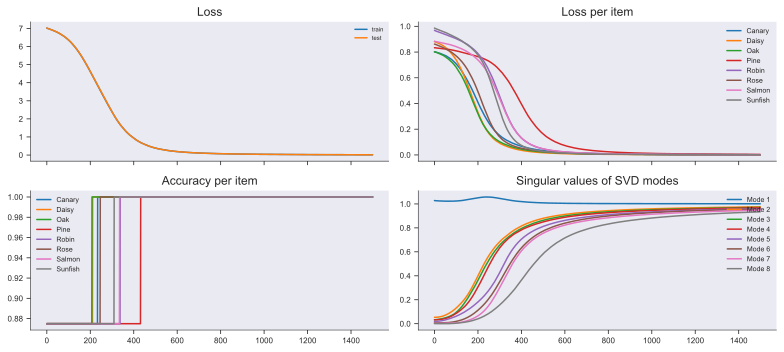

In [35]:
losses, (metrics, *_) = train_model(
    model := nn.Sequential(
        nn.Linear(dataloader.dataset.NUM_ATTRIBUTES, 8),
        nn.ReLU(),
        nn.Linear(8, dataloader.dataset.NUM_ITEMS),
        # nn.ReLU(),
        nn.Softmax(dim=1),
    ),
    optimizer := torch.optim.AdamW(model.parameters(), lr=1e-3),
    loss_fn := nn.MSELoss(reduction="sum"),
    dataloader,
    epochs=1500,
)

plot_metrics(losses, metrics, dataloader);

In [37]:
model(dataloader.dataset[7]['x'].view(1, -1))

tensor([[3.8341e-04, 9.0714e-03, 5.5365e-03, 3.8631e-04, 5.5539e-04, 9.8081e-03,
         4.6205e-03, 9.6964e-01]], grad_fn=<SoftmaxBackward>)

training model: 100%|██████████| 1500/1500 [00:11<00:00, 126.52epochs/s, accuracy=0.951, loss=0.111]


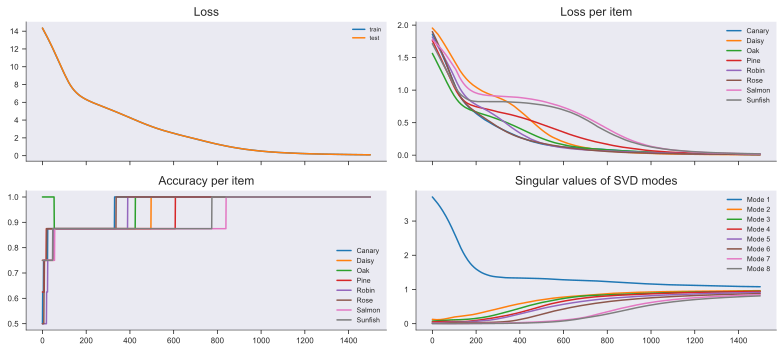

In [39]:
losses, (metrics, *_) = train_model(
    model := nn.Sequential(
        nn.Linear(dataloader.dataset.NUM_ATTRIBUTES, 8),
        nn.ReLU(),
        nn.Linear(8, dataloader.dataset.NUM_ITEMS),
        nn.Sigmoid(),
        # nn.Softmax(dim=1),
    ),
    optimizer := torch.optim.AdamW(model.parameters(), lr=1e-3),
    loss_fn := nn.MSELoss(reduction="sum"),
    dataloader,
    epochs=1500,
)

plot_metrics(losses, metrics, dataloader);